# T09: Bootstrap

TA: HUANG Xinrui, HKUST

In [1]:
library(MASS)
library(reshape2)
library(ggplot2)
library(mvtnorm)
options(warn = -1)

- The __bootstrap__ is a widely applicable and extremely powerful statistical tool that can be used to quantify the __uncertainty__ associated with a given estimator or statistical learning method.
- Frequently used to estimate the standard errors of the parameter estimates, especially when the closed form is difficult to obtain.

Consider a portfolio investment problem. 
- Given two financial assets $X$ and $Y$, where both are __random quantities__ with variance $\sigma_Y^2$, $
\sigma_X^2$ and covariance $\sigma_{XY}$. 
- Suppose we aim to minimize the __variability__ of a investment strategy that is a combination of $X$ and $Y$, i.e.,  $\min_{\alpha} Var(\alpha X + (1-\alpha)Y)$. 
- It is easy to show that the optimal $\alpha$ is obtained by $\alpha=\frac{\sigma_Y^2-\sigma_{XY}}{\sigma_X^2+\sigma_Y^2-2\sigma_{XY}}$.
- In real applications, $\sigma_X^2$, $\sigma_Y^2$ and $\sigma_{XY}$ are unknown, we can estimate these parameters from a dataset and hence obtain the estimate of $\alpha$: $$\hat{\alpha}=\frac{\hat{\sigma}_Y^2-\hat{\sigma}_{XY}}{\hat{\sigma}_X^2+\hat{\sigma}_Y^2-2\hat{\sigma}_{XY}}$$
- Here we generate simulation data by setting $\sigma_X^2=1$, $\sigma_Y^2=1.25$ and $\sigma_{XY}=0.5$. Then the ground truth is $\alpha=0.6$.
- If we sample $n$ potins of $(X,Y)$ to estimate $\alpha$ and repeat this procedure $m$ times, then we can compute the standard error of $\hat{\alpha}$ from the $m$ estimates: $$\sqrt{\frac{1}{m-1}\sum_{i=1}^m(\hat{\alpha}_i-\frac{1}{m}\sum_{i=1}^m\hat{\alpha}_i)}$$
where $\hat{\alpha}_i$ is the estimate of $\alpha$ using the $i$-th dataset sampled form the population.

In [2]:
set.seed(1107)
n <- 200
m <- 1000
sigmaX <- 1
sigmaY <- 1.25
sigmaXY <- 0.5
sigMat <- matrix(c(sigmaX, sigmaXY, sigmaXY, sigmaY), 2, 2)

alpha <- rep(0, m)
for (i in 1:m) {
    returns <- rmvnorm(n, rep(0, 2), sigMat)
    X <- returns[, 1]
    Y <- returns[, 2]
    alpha[i] <- (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

In [3]:
mean(alpha)
sd(alpha)

[1] 0.6011883

[1] 0.05949217

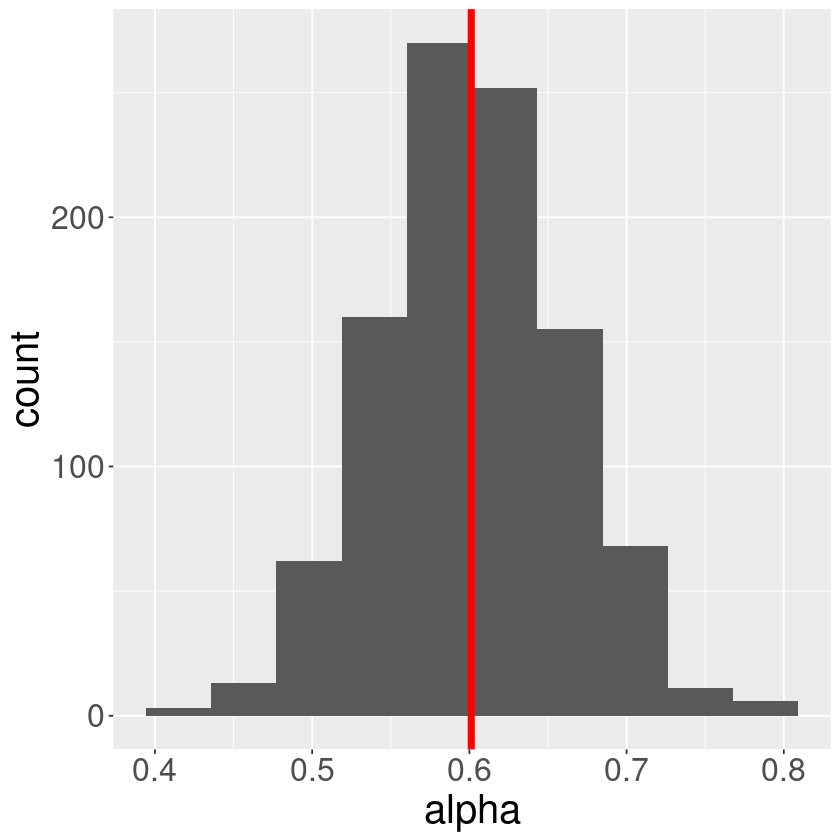

In [4]:
ggplot(data = NULL, aes(x = alpha)) +
    geom_histogram(bins = 10) +
    geom_vline(xintercept = mean(alpha), color = "red", size = 2) +
    theme(
        text = element_text(size = 24)
    )

- The mean value of $m$ estimates of $\alpha$ is 0.601.
- The standard error of $\hat{\alpha}$ is 0.059.
- The practical issue is that __we cannot sample from the ground truth given a real dataset__.
- __Bootstrap__: we instead obtain distinct data sets by repeatedly sampling observations from the __original data set__. That says the standard error of $\hat{\alpha}$ is estimated by
$$\sqrt{\frac{1}{B-1}\sum_{i=1}^B(\hat{\alpha}^*_i-\frac{1}{B}\sum_{i=1}^B\hat{\alpha}^*_i)}$$
where $\hat{\alpha}^*_i$ is the estimate of $\alpha$ using the $i$-th dataset sampled from the original dataset.

In [5]:
set.seed(1107)
n <- 200
B <- 1000
returns <- rmvnorm(n, rep(0, 2), sigMat) # the dataset is fixed once sampled

alpha_bootstrap <- rep(0, B)
for (i in 1:B) {
    returns_i <- returns[sample(1:nrow(returns), n, replace = T), ] # sample with replacement
    X <- returns_i[, 1]
    Y <- returns_i[, 2]
    alpha_bootstrap[i] <- (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

In [6]:
mean(alpha_bootstrap)
sd(alpha_bootstrap)

[1] 0.6601653

[1] 0.05709938

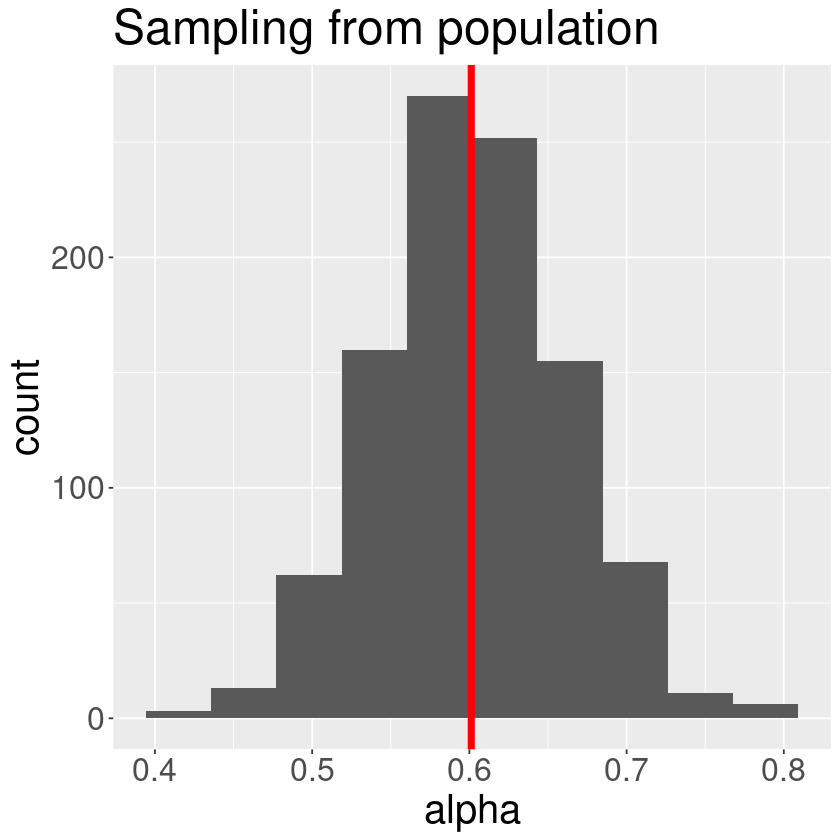

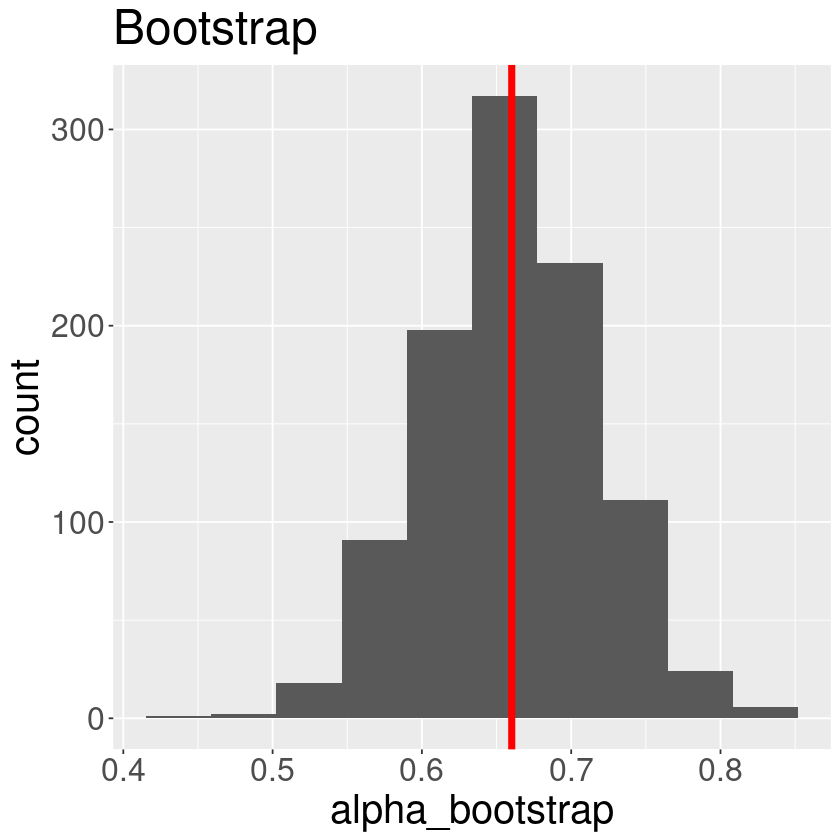

In [7]:
ggplot(data = NULL, aes(x = alpha)) +
    geom_histogram(bins = 10) +
    geom_vline(xintercept = mean(alpha), color = "red", size = 2) +
    ggtitle("Sampling from population") +
    theme(
        text = element_text(size = 24)
    )

ggplot(data = NULL, aes(x = alpha_bootstrap)) +
    geom_histogram(bins = 10) +
    geom_vline(xintercept = mean(alpha_bootstrap), color = "red", size = 2) +
    ggtitle("Bootstrap") +
    theme(
        text = element_text(size = 24)
    )

- The mean value of $B$ bootstrap estimates of $\alpha$ is 0.660.
- The bootstrap standard error of $\hat{\alpha}$ is 0.057.
- These quantities are very close to the ones obtained by sampling from the population.
- __Note: we only use bootstrap to estimate the standard error of $\hat{\alpha}$, the estimate of $\alpha$ should be be computed using the whole dastaset as what we did before.__